In [ ]:
import pandas as pd
import geopandas as gpd
import xarray as xr
import numpy as np
import rioxarray

In [27]:
ds_low_res = xr.open_dataset('/Users/ericcollins/Downloads/tasmax_day_ACCESS-CM2_ssp126_r1i1p1f1_gn_2015.nc')

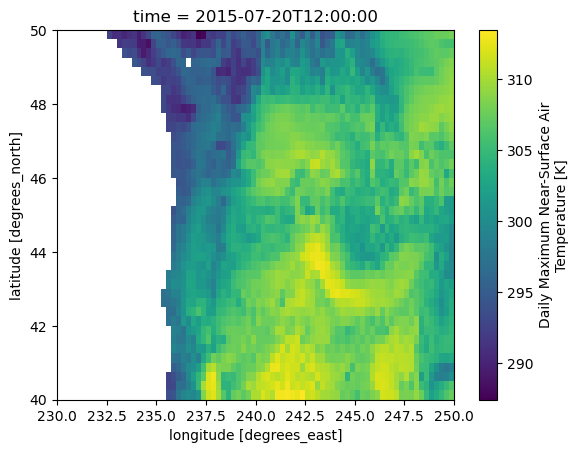

In [28]:
ds_low_res.isel(time=200).sel(lat=slice(40, 50), lon=slice(230,250))['tasmax'].plot()

In [8]:
ds.isel(time=0)

<xarray.Dataset> Size: 3MB
Dimensions:  (lat: 600, lon: 1440)
Coordinates:
    time     datetime64[ns] 8B 2015-01-01T12:00:00
  * lat      (lat) float64 5kB -59.88 -59.62 -59.38 -59.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 12kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
Data variables:
    tasmax   (lat, lon) float32 3MB ...
Attributes: (12/23)
    cmip6_source_id:       ACCESS-CM2
    cmip6_institution_id:  CSIRO-ARCCSS
    cmip6_license:         CC-BY-SA 4.0
    activity:              NEX-GDDP-CMIP6
    contact:               Dr. Rama Nemani: rama.nemani@nasa.gov, Dr. Bridget...
    Conventions:           CF-1.7
    ...                    ...
    title:                 ACCESS-CM2, r1i1p1f1, ssp126, global downscaled CM...
    resolution_id:         0.25 degree
    history:               2022-02-22T10:58:19.451337+00:00: install global a...
    doi:                   https://doi.org/10.7917/OFSG3345
    disclaimer:            This data is considered provisional and subject to...
    external_variables:    areacella

In [ ]:
S3_BUCKET = 'uw-crl'

In [ ]:
ds_fwi_historical = xr.open_dataset(f"s3://{S3_BUCKET}/climate-risk-map/backend/climate/scenariomip/NEX-GDDP-CMIP6/DECADE_MONTH_ENSEMBLE/historical/fwi_decade_month_historical.zarr", engine="zarr")
month_part = np.array([month_str.split('-')[1] for month_str in ds_fwi_historical.decade_month.values])

# Create a boolean mask for months 05 to 10
month_mask = np.isin(month_part, ['05', '06', '07', '08', '09', '10'])
ds_fwi_historical = ds_fwi_historical.isel(decade_month=month_mask)


In [ ]:
ds_fwi_2030 = xr.open_dataset(f"s3://{S3_BUCKET}/climate-risk-map/backend/climate/scenariomip/NEX-GDDP-CMIP6/DECADE_MONTH_ENSEMBLE/ssp370/fwi_decade_month_ssp370.zarr", engine="zarr")

ds_fwi_2030 = ds_fwi_2030.sel(decade_month=ds_fwi_2030.decade_month.isin(['2030-05', '2030-06', '2030-07', '2030-08', '2030-09', '2030-10']))

In [3]:
ds_burn_prob = xr.open_dataset("s3://uw-crl/student-projects/amazon-wildfire-risk-spring2025/data/cmip6_adjusted_burn_probability.zarr")

In [13]:
ds_burn_prob

<xarray.Dataset> Size: 50GB
Dimensions:                       (y: 13831, x: 23952, month: 6)
Coordinates:
    band                          int64 8B ...
  * month                         (month) <U2 48B '05' '06' '07' '08' '09' '10'
  * x                             (x) float64 192kB -125.2 -125.2 ... -116.1
  * y                             (y) float64 111kB 50.05 50.04 ... 44.78 44.78
Data variables:
    burn_probability_current      (y, x) float64 3GB ...
    burn_probability_future_2030  (month, y, x) float64 16GB ...
    fwi_current                   (month, y, x) float64 16GB ...
    fwi_future_2030               (month, y, x) float64 16GB ...
    spatial_ref                   int64 8B ...

In [3]:
num = 1
min_num = 2
l = {i: False for i in range(0, 5)}

In [4]:
(num < min_num) and (l[0] == False)

True

In [8]:
(9*7)*2 + (14*9)*2 + (14*7)*2

574

In [10]:
58 ** .5

7.615773105863909

In [14]:
from math import pi

class Cone:
    def __init__(self, height, radius):
        self.height = height
        self.radius = radius
    def volume(self):
        return pi * self.radius**2 * (self.height / 3)
    

In [22]:
class Cylinder:
    def __init__(self, height, radius):
        self.height = height
        self.radius = radius
    def volume(self):
        return pi * self.radius**2 * (self.height)
    def empty_time(self,flow_rate):
        return self.volume() * (1 / flow_rate)

In [24]:
Cylinder(height=6, radius=4).empty_time(flow_rate=2)

150.79644737231007

In [6]:
test_geom = gpd.GeoSeries.from_wkt(['POLYGON ((-119.01020320889224 46.22031646559715, -119.01042992454923 46.21815789217051, -119.0109603198906 46.2160251378839, -119.01178925204202 46.213938737931635, -119.01290870615288 46.21191877876413, -119.01430787380382 46.209984704902936, -119.01597325815118 46.20815513201743, -119.01788880475635 46.20644766804988, -119.02003605680692 46.20487874409665, -119.02239433321188 46.203463456656124, -119.02494092784285 46.202215422744295, -119.02765132799912 46.20114664925375, -119.03049945000159 46.20026741779528, -119.03345788966428 46.199586186112725, -119.03649818525987 46.19910950700404, -119.03959109048274 46.198841965515165, -119.04270685482474 46.19878613499971, -119.04581550871261 46.198942552459776, -119.04888715071361 46.199309713400154, -119.051892234098 46.19988408624501, -119.05480185005202 46.20066014618047, -119.05758800486562 46.20163042810401, -119.06022388847197 46.202785598180434, -119.062684131793 46.20411454332835, -119.06494505044544 46.20560447779052, -119.06698487248369 46.2072410657797, -119.06878394799986 46.20900855903698, -119.07032493856543 46.210889947997764, -119.07159298468251 46.21286712512803, -119.07257584961384 46.21492105887679, -119.073264038179 46.21703197658569, -119.07365088933625 46.2191795546087, -119.07373264161454 46.2213431138228, -119.07350847071697 46.22350181865472, -119.07298049887997 46.22563487771239, -119.07215377584404 46.22772174408929, -119.07103623156463 46.22974231341062, -119.06963860106748 46.2316771177069, -119.06797432212416 46.23350751323863, -119.06605940669328 46.235215860449635, -119.06391228733153 46.23678569430105, -119.06155364003064 46.23820188332761, -119.05900618517234 46.23945077586587, -119.0562944685153 46.24052033202668, -119.05344462433105 46.24140024012172, -119.05048412298798 46.242082016404325, -119.04744150544266 46.24255908714788, -119.04434610723197 46.24282685225616, -119.04122777466826 46.24288272978193, -119.03811657602012 46.24272618091654, -119.03504251051405 46.24235871520502, -119.0320352180138 46.24178387593542, -119.0291236922282 46.24100720584603, -119.0263360002611 46.240036193487285, -119.02369901125122 46.23888020076454, -119.02123813675666 46.237550372373114, -119.0189770854163 46.23605952801275, -119.0169376342748 46.234422038437586, -119.01513941898665 46.23265368655394, -119.01359974492225 46.23077151492299, -119.01233342098706 46.228793661156296, -119.01135261773588 46.226739182807584, -119.01066675111986 46.224627873463895, -119.01028239294966 46.22248007182155, -119.01020320889224 46.22031646559715))'])

In [7]:
gdf = gpd.GeoDataFrame(geometry=test_geom)

<Axes: >

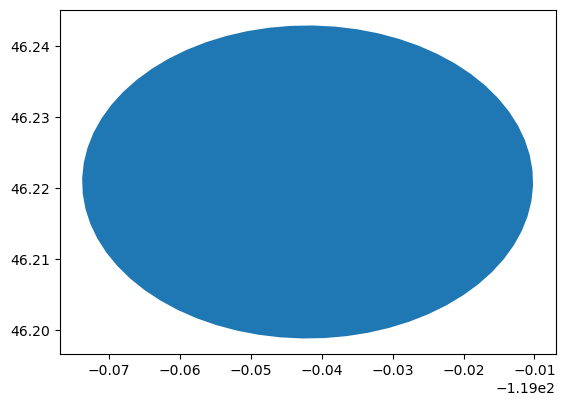

In [8]:
gdf.plot()